# PageRank

## Web as a Graph
![](figures/04-pagerank_4.jpeg)
![](figures/04-pagerank_6.jpeg)
![](figures/04-pagerank_7.jpeg)
![](figures/04-pagerank_8.jpeg)
![](figures/04-pagerank_9.jpeg)
![](figures/04-pagerank_10.jpeg)

A large scale [study](https://www.nature.com/articles/35012155) reveals that the web is in a bow-tie structure.

![](https://media.springernature.com/full/springer-static/image/art%3A10.1038%2F35012155/MediaObjects/41586_2000_Article_BF35012155_Fig1_HTML.jpg?as=webp)

## PageRank Formulation
### The "Flow" Model
![](figures/04-pagerank_12.jpeg)
![](figures/04-pagerank_13.jpeg)
![](figures/04-pagerank_14.jpeg)
### Matrix Formulation
![](figures/04-pagerank_15.jpeg)
![](figures/04-pagerank_16.jpeg)
![](figures/04-pagerank_17.jpeg)
![](figures/04-pagerank_18.jpeg)
![](figures/04-pagerank_19.jpeg)
![](figures/04-pagerank_20.jpeg)
### Summary
![](figures/04-pagerank_21.jpeg)

## PageRank: How to solve?
![](figures/04-pagerank_23.jpeg)
![](figures/04-pagerank_24.jpeg)
![](figures/04-pagerank_26.jpeg)

## Problems in vanilla PageRank
![](figures/04-pagerank_27.jpeg)
![](figures/04-pagerank_28.jpeg)
### Spider Trap Problem
![](figures/04-pagerank_29.jpeg)
### Dead End Problem
![](figures/04-pagerank_30.jpeg)
## Random Teleports
![](figures/04-pagerank_31.jpeg)
![](figures/04-pagerank_32.jpeg)
![](figures/04-pagerank_33.jpeg)
![](figures/04-pagerank_34.jpeg)

## PageRank with Google Matrix
![](figures/04-pagerank_35.jpeg)
![](figures/04-pagerank_36.jpeg)
![](figures/04-pagerank_37.jpeg)

### Implmentation for small graphs
For small graphs, one can get the PageRank scores by directly solving the eigenvalues and eigenvectors

In [43]:
import networkx as nx
import numpy as np

def google_matrix(G, beta=0.85):
    M = nx.to_numpy_matrix(G)
    N = len(G)
    M = nx.to_numpy_matrix(G)
    M = M / M.sum(axis=1)   
    p = 1. / N * np.ones(shape=(N, N))
    return beta * M + (1 - beta) * p

def page_rank(G, beta=0.85):
    M = google_matrix(G, beta)
    eignevalues, eigenvectors = np.linalg.eig(M.T)
    idx_max_eigval = np.argmax(eignevalues)
    max_eigvec = np.array(eigenvectors[:,idx_max_eigval]).flatten().real
    return max_eigvec / max_eigvec.sum()

nodes with max pagerank scores - 33


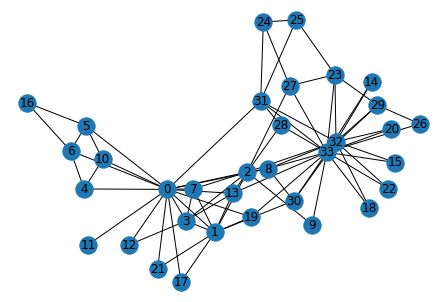

In [47]:
G = nx.karate_club_graph()
nx.draw(G, with_labels=True)
print(f"nodes with max pagerank scores - {page_rank(G).argmax()}")